## Chinook Music Store
The Chinook Record Store Database is like a digital music shop's blueprint, packed with details about artists, songs, albums, customers, and purchases. It's a compact version of iTunes, neatly organizing everything into eleven tables. It's a valuable resource for music lovers and data fans, offering insights into how a music store operates.

In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
database = "chinook.db"
conn = sql.connect(database)

In [3]:
pd.read_sql_query("select * from sqlite_master",conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [4]:
def run_query(q):
    with sql.connect(database) as conn:
        return pd.read_sql_query(q,conn)

In [5]:
q = """
    SELECT t1.track_id, t1.album_id, t2.track_id, t2.album_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.album_id in (1,3)
    """

run_query(q)

,track_id,album_id,track_id,album_id
0,1,1,1,1
1,6,1,1,1
2,7,1,1,1
3,8,1,1,1
4,9,1,1,1
...,...,...,...,...
104,4,3,4,3
105,5,3,4,3
106,3,3,5,3
107,4,3,5,3


In [6]:
q = """
    SELECT t1.track_id, t1.album_id, t2.track_id, t2.album_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1158
    """

run_query(q)

,track_id,album_id,track_id,album_id
0,1158,91,1158,91
1,1158,91,1159,91
2,1158,91,1160,91
3,1158,91,1161,91
4,1158,91,1162,91
5,1158,91,1163,91
6,1158,91,1164,91
7,1158,91,1165,91
8,1158,91,1166,91
9,1158,91,1167,91


In [7]:
q = """
    SELECT il.track_id
    FROM invoice_line il
    WHERE il.invoice_id = 1
    """

run_query(q)

,track_id
0,1158
1,1159
2,1160
3,1161
4,1162
5,1163
6,1164
7,1165
8,1166
9,1167


In [8]:
q = """
    SELECT t2.track_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1158
    
    EXCEPT
    
    SELECT il.track_id
    FROM invoice_line il
    WHERE il.invoice_id = 1
    
    
    """

run_query(q)

,track_id


In [9]:
q = """
    SELECT il.track_id
    FROM invoice_line il
    WHERE il.invoice_id = 2
    
    EXCEPT
    
    SELECT t2.track_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1162
    
    
    """

run_query(q)

,track_id
0,201
1,392
2,482
3,819
4,1119
5,1641
6,2324
7,2651
8,2701
9,3476


In [10]:
q = """
    SELECT il.invoice_id, il.track_id
    FROM invoice_line il
    WHERE il.invoice_id = 2
    
    EXCEPT
    
    SELECT t2.track_id, t2.album_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1162
    
    
    """

run_query(q)

,invoice_id,track_id
0,2,201
1,2,392
2,2,482
3,2,819
4,2,1119
5,2,1641
6,2,2324
7,2,2651
8,2,2701
9,2,3476


In [11]:
q = """
    with invoice_data as
    (SELECT il.invoice_id, min(il.track_id) track_id
    FROM invoice_line il
    GROUP BY 1
    HAVING invoice_id = 1)
    
    SELECT invoice_id,
    case
        when(
            SELECT t2.track_id
            FROM track t1
            INNER JOIN track t2
            ON t1.album_id = t2.album_id
            WHERE t1.track_id = invd.track_id

            EXCEPT

            SELECT il.track_id
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
             
        ) is null
        then "Yes"
        else "No"
    end as Purchased_Album
        
    FROM invoice_data invd
    
    """

run_query(q)

,invoice_id,Purchased_Album
0,1,Yes


In [12]:
q = """
    SELECT t2.track_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1158
    
    EXCEPT
    
    SELECT il.track_id
    FROM invoice_line il
    WHERE il.invoice_id = 1
    """

run_query(q)

,track_id


In [13]:
q = """
    SELECT t1.track_id, t1.album_id, t2.track_id,t2.album_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1158
    """

run_query(q)

,track_id,album_id,track_id,album_id
0,1158,91,1158,91
1,1158,91,1159,91
2,1158,91,1160,91
3,1158,91,1161,91
4,1158,91,1162,91
5,1158,91,1163,91
6,1158,91,1164,91
7,1158,91,1165,91
8,1158,91,1166,91
9,1158,91,1167,91


In [14]:
q = """
    SELECT t2.track_id
    FROM track t1
    INNER JOIN track t2
    ON t1.album_id = t2.album_id
    WHERE t1.track_id = 1986
    """

run_query(q)

,track_id
0,1986
1,1987
2,1988
3,1989
4,1990
5,1991
6,1992
7,1993
8,1994
9,1995


In [15]:
q = """
    SELECT invoice_id, track_id, unit_price
    FROM invoice_line il
    WHERE invoice_id = 5
    """

run_query(q)

,invoice_id,track_id,unit_price
0,5,1986,0.99
1,5,1987,0.99
2,5,1988,0.99
3,5,1989,0.99
4,5,1990,0.99
5,5,1991,0.99
6,5,1992,0.99
7,5,1993,0.99
8,5,1994,0.99
9,5,1995,0.99


In [16]:
q = """
    SELECT invoice_id, count(track_id) no_of_tracks, sum(unit_price) invoice_price
    FROM invoice_line il
    WHERE invoice_id = 5
    group by 1
    """

run_query(q)

,invoice_id,no_of_tracks,invoice_price
0,5,17,16.83


In [17]:
q = """
    SELECT invoice_id, count(track_id) no_of_tracks, sum(unit_price) invoice_price
    FROM invoice_line il
    group by 1
    """

run_query(q)

,invoice_id,no_of_tracks,invoice_price
0,1,16,15.84
1,2,10,9.90
2,3,2,1.98
3,4,8,7.92
4,5,17,16.83
...,...,...,...
609,610,7,6.93
610,611,2,1.98
611,612,12,11.88
612,613,9,8.91


In [18]:
q = """
    with invoice_data as
    (SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID
    FROM invoice_line il
    WHERE invoice_id = 1
    GROUP BY 1)
    
    SELECT invd.invoice_id,
    case
        when(
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID

        EXCEPT

        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        ) is null
        
        AND
        
        (
        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        
        EXCEPT
        
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID
        ) is null
        
        then "Yes"
        else "No"
    end as Album_Purchased
    
    FROM invoice_data invd
    """

run_query(q)

,Invoice_ID,Album_Purchased
0,1,Yes


In [19]:
q = """
    with invoice_data as
    (SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID
    FROM invoice_line il
    --WHERE invoice_id = 1
    GROUP BY 1)
    
    SELECT invd.invoice_id,
    case
        when(
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID

        EXCEPT

        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        ) is null
        
        AND
        
        (
        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        
        EXCEPT
        
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID
        ) is null
        
        then "Yes"
        else "No"
    end as Album_Purchased
    
    FROM invoice_data invd
    """

run_query(q)

,Invoice_ID,Album_Purchased
0,1,Yes
1,2,No
2,3,No
3,4,No
4,5,Yes
...,...,...
609,610,No
610,611,No
611,612,Yes
612,613,No


In [20]:
q = """
    SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID,sum(unit_price) invoice_price
    FROM invoice_line il
    --WHERE invoice_id = 1
    GROUP BY 1
    """

run_query(q)

,Invoice_ID,Track_ID,invoice_price
0,1,1158,15.84
1,2,201,9.90
2,3,2516,1.98
3,4,748,7.92
4,5,1986,16.83
...,...,...,...
609,610,814,6.93
610,611,57,1.98
611,612,2204,11.88
612,613,1126,8.91


In [21]:
# 1. Extract all tracks of the album
# 2. Extract tracks purchased in an invoice
# 3. Apply EXCEPT from tracks to invoice
# 4. Apply EXCEPT both ways
# 5. Apply temporary view

q = """
    with invoice_data as
    (SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID, count(il.track_id) no_of_tracks,sum(unit_price) invoice_price
    FROM invoice_line il
    --WHERE invoice_id = 1
    GROUP BY 1)
    
    SELECT invd.invoice_id,invd.invoice_price,invd.no_of_tracks,
    case
        when(
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID

        EXCEPT

        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        ) is null
        
        AND
        
        (
        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        
        EXCEPT
        
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID
        ) is null
        
        then "Yes"
        else "No"
    end as Album_Purchased
    
    FROM invoice_data invd
    """

run_query(q)

,Invoice_ID,invoice_price,no_of_tracks,Album_Purchased
0,1,15.84,16,Yes
1,2,9.90,10,No
2,3,1.98,2,No
3,4,7.92,8,No
4,5,16.83,17,Yes
...,...,...,...,...
609,610,6.93,7,No
610,611,1.98,2,No
611,612,11.88,12,Yes
612,613,8.91,9,No


In [22]:
q = """
    with invoice_data as
    (SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID
    FROM invoice_line il
    GROUP BY 1)
    
    SELECT invd.invoice_id,
    case
        when(
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID

        EXCEPT

        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        ) is null
        then "Yes"
        else "No"
    end as Album_Purchased
    
    FROM invoice_data invd
    -- GROUP BY 1
    """

run_query(q).value_counts('Album_Purchased')

Album_Purchased
No     497
Yes    117
dtype: int64

In [23]:
# 1. Extract all tracks of the album
# 2. Extract tracks purchased in an invoice
# 3. Apply EXCEPT from tracks to invoice
# 4. Apply EXCEPT both ways
# 5. Apply temporary view
# 6. Calculate Percentage of album_purchased

q = """
    with invoice_data as
    (SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID
    FROM invoice_line il
    GROUP BY 1),
    
    album_purchased as    
    (SELECT invd.invoice_id,
    case
        when(
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID

        EXCEPT

        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        ) is null
        
        AND
        
        (
        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        
        EXCEPT
        
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID
        ) is null
        
        then "Yes"
        else "No"
    end as Album_Purchased
    
    FROM invoice_data invd)
    
    SELECT Album_Purchased, count(invoice_id) Invoice_Count,
    round(cast(count(invoice_id) as float)/(select count(invoice_id) from album_purchased)*100,2) Percentage
    FROM album_purchased
    Group by 1
    Order by 1 DESC
    """

run_query(q)

,Album_Purchased,Invoice_Count,Percentage
0,Yes,114,18.57
1,No,500,81.43


In [24]:
# 1. Extract all tracks of the album
# 2. Extract tracks purchased in an invoice
# 3. Apply EXCEPT from tracks to invoice
# 4. Apply EXCEPT both ways
# 5. Apply temporary view
# 6. Calculate Percentage of album_purchased
# 7. Add columns for invoice_price and tracks_sold

q = """
    with invoice_data as
    (SELECT il.invoice_id Invoice_ID, min(il.track_id) Track_ID, count(il.track_id) no_of_tracks,sum(unit_price) invoice_price
    FROM invoice_line il
    --WHERE invoice_id = 1
    GROUP BY 1),
    
    album_purchased as    
    (SELECT invd.invoice_id,invd.invoice_price,invd.no_of_tracks,
    case
        when(
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID

        EXCEPT

        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        ) is null
        
        AND
        
        (
        SELECT il.track_id Tracks_in_Invoice
        FROM invoice_line il
        WHERE il.invoice_id = invd.Invoice_ID
        
        EXCEPT
        
        SELECT t2.track_id Tracks_in_Album
        FROM track t1
        INNER JOIN track t2
        ON t1.album_id = t2.album_id
        WHERE t1.track_id = invd.Track_ID
        ) is null
        
        then "Yes"
        else "No"
    end as Album_Purchased
    
    FROM invoice_data invd)
    
    SELECT Album_Purchased, count(invoice_id) Invoice_Count,
    round(cast(count(invoice_id) as float)/(select count(invoice_id) from album_purchased)*100,2) Percentage,
    sum(invoice_price) Invoice_Price,sum(no_of_tracks) Tracks_Sold
    FROM album_purchased
    Group by 1
    Order by 1 DESC
    
    """

run_query(q)

,Album_Purchased,Invoice_Count,Percentage,Invoice_Price,Tracks_Sold
0,Yes,114,18.57,1461.24,1476
1,No,500,81.43,3248.19,3281


## Chinook Music Store

The Chinook Records Store Database is like a digital music shop's blueprint, packed with detail about artists, songs, albums, customers, and purchases. It's a compact version of iTunes, neatl organizing everything into eleven tables. It's a valuable resource for music lovers and data fans offering insights into how a music store operates.

In [25]:
import sqlite3 as sql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
db = 'chinook.db'

def run_query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q, conn)

In [27]:
q = """
WITH usa_tracks AS
(
    SELECT t.genre_id AS genre_id, il.invoice_line_id
    FROM track AS t
    INNER JOIN invoice_line AS il ON il.track_id = t.track_id 
    INNER JOIN invoice AS i ON i.invoice_id = il.invoice_id 
    WHERE i.billing_country = 'USA'
)
SELECT g.name AS genre_name,
       COUNT(usa.genre_id) AS num_purchases,
       ROUND((CAST(COUNT(usa.genre_id) AS FLOAT) / (SELECT COUNT(genre_id) FROM usa_tracks)) * 100, 2) AS percentage_sold
FROM usa_tracks AS usa
INNER JOIN genre AS g ON g.genre_id = usa.genre_id
GROUP BY g.name
ORDER BY num_purchases DESC;
"""

df = run_query(q)
print(df)


            genre_name  num_purchases  percentage_sold
0                 Rock            561            53.38
1   Alternative & Punk            130            12.37
2                Metal            124            11.80
3             R&B/Soul             53             5.04
4                Blues             36             3.43
5          Alternative             35             3.33
6                  Pop             22             2.09
7                Latin             22             2.09
8          Hip Hop/Rap             20             1.90
9                 Jazz             14             1.33
10      Easy Listening             13             1.24
11              Reggae              6             0.57
12   Electronica/Dance              5             0.48
13           Classical              4             0.38
14         Heavy Metal              3             0.29
15          Soundtrack              2             0.19
16            TV Shows              1             0.10


C:\Users\Powad\AppData\Local\Temp\ipykernel_700\2395267758.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['genre_name'], fontsize=10.5, color='grey')


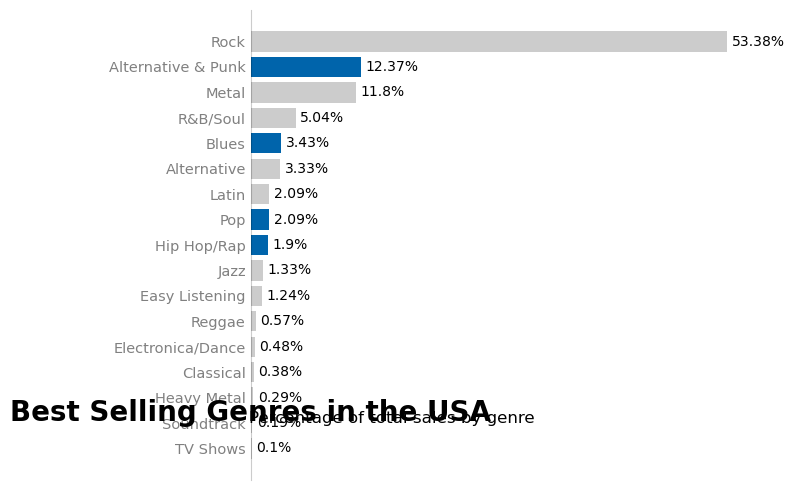

In [28]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by percentage sold
df.sort_values(by='percentage_sold', inplace=True)

# Creating a color map to identify key albums of interest
album_options = ['Hip Hop/Rap', 'Alternative & Punk', 'Blues', 'Pop']
cmap = df['genre_name'].apply(lambda x: '#0064AB' if x in album_options else '#CCCCCC')

# Customizing axes and Layout
fig, ax = plt.subplots(figsize=(8, 5))  # Adjusted figsize

# Adding the title
plt.text(-0.02, 1.07, 'Best Selling Genres in the USA', fontsize=20, fontweight='bold', ha='center')

# Creating the bar plot
bars = ax.barh(df['genre_name'], df['percentage_sold'], height=0.8, color=cmap)

# Adding text and adjusting width of bars
for bar, percentage in zip(bars, df['percentage_sold']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage}%', ha='left', va='center')

# Customizing axes and Layout
ax.set_yticklabels(df['genre_name'], fontsize=10.5, color='grey')
ax.set_xticks([])
plt.text(-0.2, 1.02, 'Percentage of total sales by genre', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjusting left spine opacity
ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)

# Removing y-axis tick parameters
ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
plt.show()


## Results

Based on the genre sales pattern in the USAChinook should select these options from the list of available albums.

Punk: Red Tone

Blues: Slim Jim Bites

Pop: Meteor and the Girls

It's worth noting that these three genres only make up 17% of total sales. To maximize profitability, the company should be on the lookout for Rock songs since they account for 53% of sales in the US market

Employee Sales Performance Analysis

## The Situation

After an initial purchase, each Chinook customer is assigned to a sales support agent. The company asked us to analyze purchases from customers belonging to each sales agentThey want to know if some agents are performing better or worse than others

In [29]:
q = """
WITH t1 AS (
    SELECT em.first_name || ' ' || em.last_name AS sales_rep_name,
           em.hire_date,
           COUNT(cu.customer_id) AS num_invoices,
           CAST(SUM(iv.total) AS Integer) AS total_sales
    FROM employee em
    JOIN customer cu ON em.employee_id = cu.support_rep_id
    JOIN invoice iv ON iv.customer_id = cu.customer_id
    GROUP BY 1
    ORDER BY 4 DESC
)
SELECT *,
       ROUND(CAST(total_sales AS Float) / num_invoices, 2) AS sales_per_customer
FROM t1;
"""

# Assuming you have a function run_query to execute the SQL query and retrieve the results
df = run_query(q)
print(df)


  sales_rep_name            hire_date  num_invoices  total_sales  \
0   Jane Peacock  2017-04-01 00:00:00           212         1731   
1  Margaret Park  2017-05-03 00:00:00           214         1584   
2  Steve Johnson  2017-10-17 00:00:00           188         1393   

   sales_per_customer  
0                8.17  
1                7.40  
2                7.41  


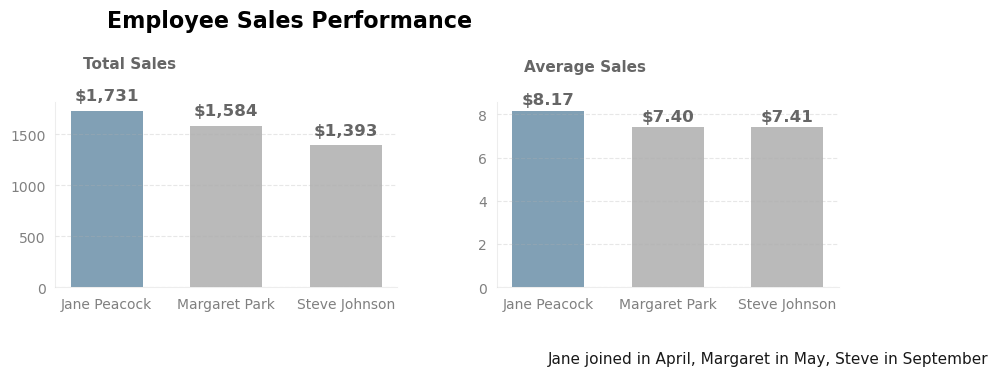

In [30]:
import matplotlib.pyplot as plt

# Data
sales_rep_name = df["sales_rep_name"].values
total_sales = df["total_sales"].values
sales_per_customer = df["sales_per_customer"].values

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Total sales chart
axes[0].bar(sales_rep_name, total_sales, color='#BABABA', width=0.6)
axes[0].bar(sales_rep_name[0], total_sales[0], color='#0064AB', alpha=0.3, width=0.6)

# Total sales chart Label
axes[0].text(x=-0.2, y=2150, s='Total Sales', size=11, fontweight='bold', alpha=0.6)

# Total sales annotations
for sales, index in zip(total_sales, range(3)):
    axes[0].text(x=index, y=sales + 100, s='${:,.0f}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=12)

# Main chart title
axes[0].text(x=0, y=2550, s='Employee Sales Performance', size=16, fontweight='bold')

# Average sales chart
axes[1].bar(sales_rep_name, sales_per_customer, color='#BABABA', width=0.6)
axes[1].bar(sales_rep_name[0], sales_per_customer[0], color='#0064AB', alpha=0.3, width=0.6)

# Average sales chart Label
axes[1].text(x=-0.2, y=10, s='Average Sales', size=11, fontweight='bold', alpha=0.6)

# Average sales annotations
for sales, index in zip(sales_per_customer, range(3)):
    axes[1].text(x=index, y=sales + 0.3, s='${:,.2f}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=12)

# Footnote
axes[1].text(x=0, y=-3.5, s='Jane joined in April, Margaret in May, Steve in September', size=11, alpha=0.9)

# Common attributes to both charts
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)
    ax.tick_params(left=False, bottom=False, labelsize=10, labelcolor='grey')
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Results

Of the three sales employees, Jane achieved the highest total sales of 1,731 dollars. Margaret Park comes second, and Steve occupies the last place with 1,393 dollars in salesThis difference in sales is understandable, considering that Jane and Margaret were employed about five months before Steve.

Jane's average sales numbers support her leading position. She has achieved 8.17 dollars in sales per customer, the highest of the three employees. Steve also performs marginally better than Margaret despite the difference in their employment dates.

## Sales by Country

## The Situation

Chinook wants to understand how sales are distributed across different countries. The company intends to identify countries with growth potential and may even run advertising campaigns in these countries.

Analysis

To answer this question, we will write a query that collates data on purchases from different countries. For each country, we will include the total number of customers, total sales value, average sales per customerand the average order value. Where a country has only one customer, we will collect it into an "Other" group

In [31]:
# Define the SQL query as a string
q = """
WITH t1 AS (
    SELECT 
        country, 
        COUNT(customer_id) AS num_customers
    FROM 
        customer 
    GROUP BY 
        country
),
t2 AS (
    SELECT 
        cu.country,
        ROUND(SUM(iv.total), 2) AS total_sales,
        COUNT(iv.invoice_id) AS num_sales
    FROM 
        customer cu
    JOIN 
        invoice iv ON cu.customer_id = iv.customer_id
    GROUP BY 
        cu.country
),
t3 AS (
    SELECT 
        CASE 
            WHEN t1.num_customers = 1 THEN 'Others'
            ELSE t1.country
        END AS countries,
        SUM(t1.num_customers) AS num_customers,
        SUM(t2.total_sales) AS total_sales, 
        SUM(t2.num_sales) AS num_sales
    FROM 
        t1 
    JOIN 
        t2 ON t1.country = t2.country
    GROUP BY 
        countries
)
SELECT 
    countries,
    num_customers,
    total_sales,
    ROUND(total_sales / num_sales, 2) AS avg_order_value,
    ROUND(total_sales / num_customers, 2) AS sales_per_customer
FROM 
    t3
ORDER BY 
    CASE WHEN countries = 'Others' THEN 1 ELSE 0 END, 
    num_customers DESC;
"""

# Assuming `run_query` is a function that executes the SQL query and returns the result as a dataframe
df = run_query(q)

# Print the resulting dataframe
print(df)


        countries  num_customers  total_sales  avg_order_value  \
0             USA             13      1040.49             7.94   
1          Canada              8       535.59             7.05   
2          Brazil              5       427.68             7.01   
3          France              5       389.07             7.78   
4         Germany              4       334.62             8.16   
5  United Kingdom              3       245.52             8.77   
6  Czech Republic              2       273.24             9.11   
7           India              2       183.15             8.72   
8        Portugal              2       185.13             6.38   
9          Others             15      1094.94             7.45   

   sales_per_customer  
0               80.04  
1               66.95  
2               85.54  
3               77.81  
4               83.66  
5               81.84  
6              136.62  
7               91.58  
8               92.57  
9               73.00  


In [32]:
import pandas as pd

# Assuming df is your DataFrame
# Define or create your DataFrame here
df = pd.DataFrame({
    'num_customers': [100, 200, 150, 300],
    'total_sales': [5000, 8000, 6000, 10000],
    'sales_per_customer': [50, 40, 45, 33]
})

# Calculate average sales per customer
avg_cust_purchase = df.sales_per_customer.mean()
print("Average Sales per Customer:", avg_cust_purchase)

# Calculate percentage of customers and sales
df['pcent_customer'] = round(100 * df.num_customers / df.num_customers.sum(), 1)
df['pcent_sales'] = round(100 * df.total_sales / df.total_sales.sum(), 1)

# Calculate the difference between sales per customer and the average sales per customer
df['cust_purchase_diff'] = round(100 * (df.sales_per_customer - avg_cust_purchase) / avg_cust_purchase, 2)

# Display the updated DataFrame
print(df)


Average Sales per Customer: 42.0
   num_customers  total_sales  sales_per_customer  pcent_customer  \
0            100         5000                  50            13.3   
1            200         8000                  40            26.7   
2            150         6000                  45            20.0   
3            300        10000                  33            40.0   

   pcent_sales  cust_purchase_diff  
0         17.2               19.05  
1         27.6               -4.76  
2         20.7                7.14  
3         34.5              -21.43  


In [33]:
df

,num_customers,total_sales,sales_per_customer,pcent_customer,pcent_sales,cust_purchase_diff
0,100,5000,50,13.3,17.2,19.05
1,200,8000,40,26.7,27.6,-4.76
2,150,6000,45,20.0,20.7,7.14
3,300,10000,33,40.0,34.5,-21.43


In [34]:
import pandas as pd

# Assuming df is your DataFrame
# Define or create your DataFrame here
# For example:
df = pd.DataFrame({
    'num_customers': [100, 200, 150, 300],
    'total_sales': [5000, 8000, 6000, 10000],
    'sales_per_customer': [50, 40, 45, 33]
})

# Calculate average sales per customer
avg_cust_purchase = df.sales_per_customer.mean()
print("Average Sales per Customer:", avg_cust_purchase)

# Calculate percentage of customers and sales
df['pcent_customer'] = round(100 * df.num_customers / df.num_customers.sum(), 1)
df['pcent_sales'] = round(100 * df.total_sales / df.total_sales.sum(), 1)

# Calculate the difference between sales per customer and the average sales per customer
df['cust_purchase_diff'] = round(100 * (df.sales_per_customer - avg_cust_purchase) /
                                 avg_cust_purchase, 2)

# Display the updated DataFrame
print(df)


Average Sales per Customer: 42.0
   num_customers  total_sales  sales_per_customer  pcent_customer  \
0            100         5000                  50            13.3   
1            200         8000                  40            26.7   
2            150         6000                  45            20.0   
3            300        10000                  33            40.0   

   pcent_sales  cust_purchase_diff  
0         17.2               19.05  
1         27.6               -4.76  
2         20.7                7.14  
3         34.5              -21.43  


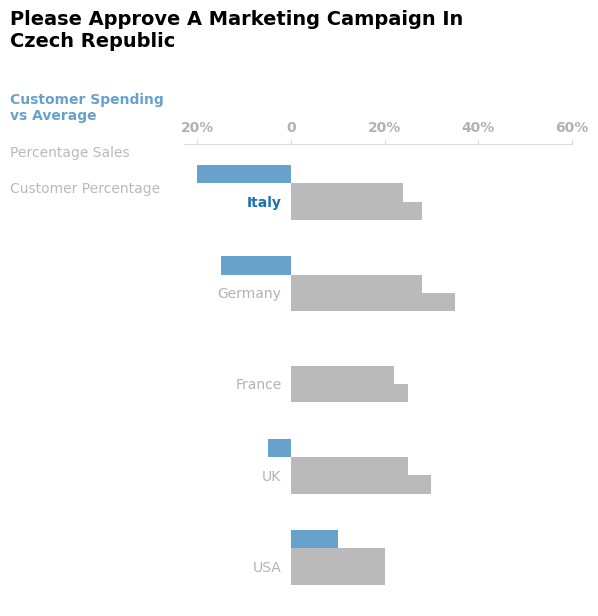

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Define or create your DataFrame here
# For example:
df = pd.DataFrame({
    'countries': ['USA', 'UK', 'France', 'Germany', 'Italy'],
    'num_customers': [100, 200, 150, 300, 250],
    'total_sales': [5000, 8000, 6000, 10000, 7000],
    'sales_per_customer': [50, 40, 45, 33, 28],
    'pcent_customer': [20, 30, 25, 35, 28],
    'pcent_sales': [20, 25, 22, 28, 24],
    'cust_purchase_diff': [10, -5, 0, -15, -20]
})

y_labs = df.countries.values
y_axes = np.arange(df.countries.size)

fig = plt.figure(figsize=(5, 6))

plt.barh(y_axes-0.3, df.pcent_customer, height=0.2, color='#BABABA')
plt.barh(y_axes-0.1, df.pcent_sales, height=0.2, color='#BABABA')
plt.barh(y_axes+0.1, df.cust_purchase_diff, height=0.2, color='#0064AB', alpha=0.6)

color_map = ['', '', '', '', 'Yes']

# Annotate y axis ticks
for loc, label, color in zip(y_axes, y_labs, color_map):
    if color == 'Yes':
        plt.text(x=-2, y=loc-0.25, s=label, ha='right', color='#0064AB', alpha=0.9, size=10, fontweight='bold')
    else:
        plt.text(x=-2, y=loc-0.25, s=label, ha='right', size=10, alpha=0.3)

# Set plot Legend
plt.text(x=-60, y=4.7, s='Customer Spending\nvs Average', color='#0064AB', size=10, alpha=0.6, fontweight='bold')
plt.text(x=-60, y=4.3, s='Percentage Sales', color='#BABABA', size=10)
plt.text(x=-60, y=3.9, s='Customer Percentage', color='#BABABA', size=10)

# Set plot title
plt.text(x=-60, y=5.5, s='Please Approve A Marketing Campaign In\nCzech Republic', size=14, fontweight='bold')

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True, bottom=True, top=False)
    ax.tick_params(left=False, bottom=False, color='#ddd')
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20, 0, 20, 40, 60], ['20%', '0', '20%', '40%', '60%'], size=10, alpha=0.3, fontweight='bold')

plt.show()


## Results

• The Majority of Chinook sales arise from US and Canada. These two countries dominate in customer base as well as sales. However, customers spend lesser per invoice in these countries.

• Although the Czech Republic, Portugal, and India record fewer customers and lesser sales values, customers spend more per invoice than in other countries. To increase revenue from these three markets, Chinook could run

marketing campaigns to expand its customer base.

Since the data from each country are relatively few, the initial marketing campaigns should be small. They should aim to collect and analyze customer data so that the right trends are confidently identified

## How Many Tracks Never Sell?

To answer this questionwe will have to distriguish between the entire inventory of tracks in the track table and the distinct instances of tracks from the invoice_line table

In [41]:
#Additional calculations

# Additional calculations
avg_cust_purchase = df.sales_per_customer.mean()
print(avg_cust_purchase)

df['pcent_customer'] = round(100 * df.num_customers / df.num_customers.sum(), 1)
df['pcent_sales'] = round(100 * df.total_sales / df.total_sales.sum(), 1)

# Ensure there's a comma after the 'avg_cust_purchase' in the calculation below
df['cust_purchase_diff'] = round(188 * (df.sales_per_customer - avg_cust_purchase) / avg_cust_purchase, 2)


39.2


In [46]:
purchased = df.T
purchased = purchased.iloc[[1,2],0]
purchased_list = purchased.tolist()

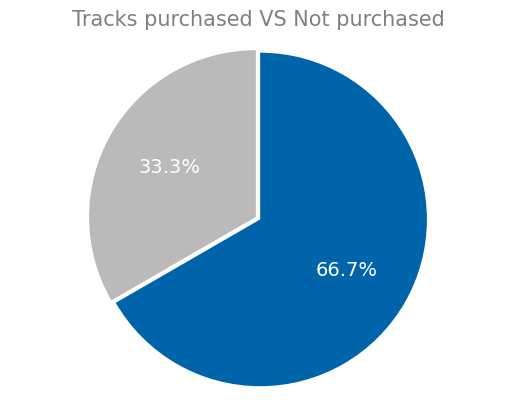

In [48]:
import matplotlib.pyplot as plt

# Assuming 'purchased_list' is defined correctly
purchased_list = [10, 20]  # Example data, replace it with your actual data

# Plot 
plt.pie(purchased_list, explode=(0, 0.03), startangle=90, autopct='%1.1f%%',
        textprops={'fontsize': 14, 'color': 'white'},
        colors=('#BABABA', '#0064AB')
        )

# Plot Aesthetics
plt.title("Tracks purchased VS Not purchased", fontsize=15, color='gray')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## Observations
Surprisingly, almost half of the track inventory at Chinook has not sold. Lets take a look at the bottom performers and see of we can learn more:

## Observations
74 artists have not sold any units, with most of these tracks belonging to the classical music genre. Half of the company's inventory remains unsold, potentially trying up woeking capital without generating returns. Depending on the payment arrangement with record labels, there are two scenarios to consider:

If Chinook pays a fixed fee to host these tracks, it might be wise to focus on more popular genres and discontinues signing less succesful artists.

If Chinook pays the record label based on sales percentage, there is little downside to keeping the tracks in the store.

Regardless of the scenario, Chinook should explore ways to promote these low-selling artists. Suggestions could be integrated into the purchasing process or displayed on the website's cart page to increase exposure.

Albums VS Individual Tracks
The Chinook store allows customers to buy music in two ways: either album or as individual track. However individuals cant buy a full album then add individual tracks to the same purchase unless they select each track manually.When customer purchase albums, they are charged the same price as if they had bought each track seperately. Management is contemplating a new purchasing approach to cut costs. Instead of buying every track on album, they are considering purchasing only the most popular tracks from each album from record companies.

​